## spectra match distribution for the MaxQuant output, based on [python code](https://raw.githubusercontent.com/animesh/scripts/master/evidencePep.py)

<a href="https://colab.research.google.com/github/animesh/notebooks/blob/master/evidencePep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
home=Path.home()
pathFiles = home / Path('promec/Elite/LARS/2018/november/Rolf final/')
fileName='evidence.txt'
trainList=list(pathFiles.rglob(fileName))
print(pathFiles,trainList)

/home/ash022/promec/Elite/LARS/2018/november/Rolf final [PosixPath('/home/ash022/promec/Elite/LARS/2018/november/Rolf final/White/combined/txt/evidence.txt'), PosixPath('/home/ash022/promec/Elite/LARS/2018/november/Rolf final/combined/txt/evidence.txt'), PosixPath('/home/ash022/promec/Elite/LARS/2018/november/Rolf final/Red/combined/txt/evidence.txt'), PosixPath('/home/ash022/promec/Elite/LARS/2018/november/Rolf final/txt/evidence.txt')]


In [2]:
import pandas as pd
df=pd.DataFrame()
for f in trainList:
    peptideHits=pd.read_csv(f,low_memory=False,sep='\t')
    print(f)
    peptideHits['Name']=f
    df=pd.concat([df,peptideHits],sort=False)
print(df.head(1))
#print(df.columns)

/home/ash022/promec/Elite/LARS/2018/november/Rolf final/White/combined/txt/evidence.txt
/home/ash022/promec/Elite/LARS/2018/november/Rolf final/combined/txt/evidence.txt
/home/ash022/promec/Elite/LARS/2018/november/Rolf final/Red/combined/txt/evidence.txt
/home/ash022/promec/Elite/LARS/2018/november/Rolf final/txt/evidence.txt
              Sequence  Length     Modifications          Modified sequence  \
0  AAALVAQDYLNGQHTHGYK      19  Deamidation (NQ)  _AAALVAQDYLN(de)GQHTHGYK_   

      Deamidation (NQ) Probabilities Oxidation (M) Probabilities  \
0  AAALVAQDYLN(0.795)GQ(0.205)HTHGYK                         NaN   

               Deamidation (NQ) Score Diffs Oxidation (M) Score Diffs  \
0  AAALVAQ(-34.89)DYLN(5.89)GQ(-5.89)HTHGYK                       NaN   

   Acetyl (Protein N-term)  Deamidation (NQ)  ...  id  Protein group IDs  \
0                        0                 1  ...   0                950   

  Peptide ID Mod. peptide ID MS/MS IDs Best MS/MS Deamidation (NQ) site IDs

In [3]:
colStrName="Raw file"
print(df.columns.get_loc(colStrName))
dfDP=df.loc[:, df.columns.str.startswith(colStrName)]
dfDP=dfDP[dfDP[colStrName].notnull()]
#dfDP=dfDP.rename(columns = lambda x : str(x)[3:])
dfDPcnt=dfDP[colStrName].value_counts()
dfDPcnt[dfDPcnt>10].plot(kind='barh')
print(dfDPcnt)

16
181101_Rolf_30_12_181130181452    19040
181101_Rolf_19_11_181202073322    18435
181101_Rolf_30_11_181130145640    18362
181101_Rolf_29_12_181127081955    18284
181101_Rolf_19_12_181202105113    18152
181101_Rolf_15_11_181128222424    17555
181101_Rolf_15_12_181129014218    17500
181101_Rolf_29_13_181127113746    16739
181101_Rolf_12_11_181122213247    16406
181101_Rolf_29_11_181127050157    16078
181101_Rolf_19_13_181202140927    15704
181101_Rolf_15_13_181129050043    15127
181101_Rolf_29_10_181127014400    15125
181101_Rolf_19_10_181202041503    14834
181101_Rolf_12_12_181123005207    14345
181101_Rolf_26_12_181117052116    13458
181101_Rolf_12_13_181123041109    13436
181101_Rolf_15_10_181128190609    13330
181101_Rolf_12_10_181122181318    13318
181101_Rolf_26_11_181117020532    13048
181101_Rolf_30_10_181130113851    13005
181101_Rolf_26_13_181117083723    11373
181101_Rolf_26_10_181116224949     9671
181101_Rolf_29_2                   9297
181101_Rolf_19_9_181202005611      89

writing output to ... 
/home/ash022/promec/Elite/LARS/2018/november/Rolf final/evidence.txtRaw file.png
/home/ash022/promec/Elite/LARS/2018/november/Rolf final/evidence.txtRaw file.csv


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


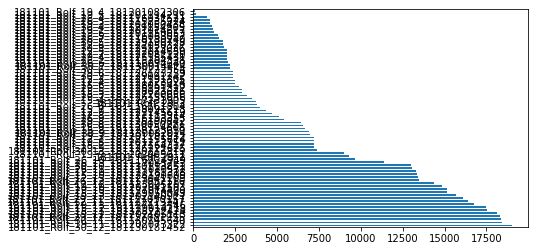

In [4]:
writeEviPlot=pathFiles/(fileName+colStrName+".png")
print("writing output to ... ")
dfDPcnt[dfDPcnt>10].plot(kind='barh').figure.savefig(writeEviPlot,dpi=100,bbox_inches = "tight")
print(writeEviPlot)

writeEviData=pathFiles/(fileName+colStrName+".csv")
dfDPcnt.to_csv(writeEviData)
print(writeEviData)